<a href="https://colab.research.google.com/github/Juhyeon-creater/Sessac-project2/blob/main/hundred_pose_yolo_pelvis_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Correlation Analysis Result
YOLO Angle ↔ Pelvis Roll Diff : -0.534


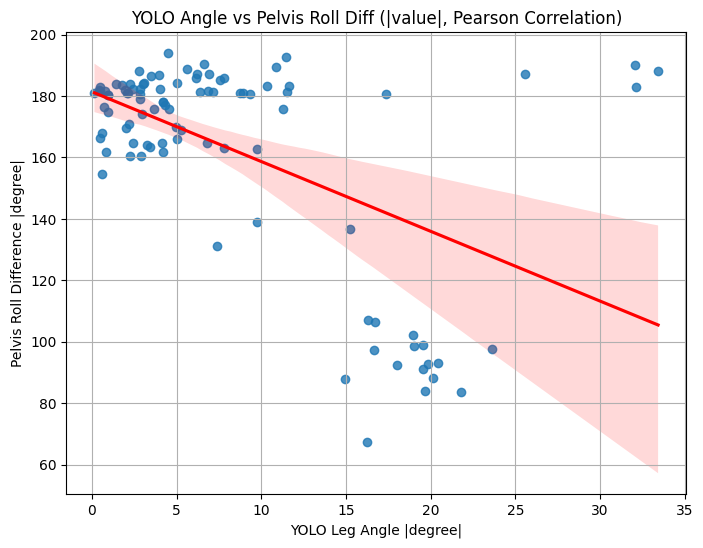

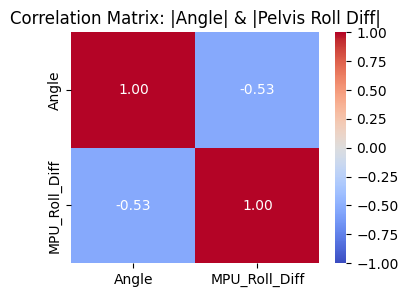

In [8]:
# Hundred pose corr 분석 스크립트
# YOLO Angle ↔ Pelvis Roll Diff 상관계수 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CSV 로드
csv_path = "/content/drive/MyDrive/shared_googledrive(Sessac Final Project)/video/머메이드/HJ_Hundred_20251120 편집 - HJ_Hundred_Mermaid_20251120.csv"
df = pd.read_csv(csv_path)

# 2. 결측 처리 (Pelvis/YOLO 핵심 데이터 없는 행 제거)
#    - 회귀형 상관: MPU_Roll_Diff, Angle
df = df.dropna(subset=["MPU_Roll_Diff", "Angle"])

# df = df.dropna(subset=["MPU_Roll_Diff", "Angle", "YOLO_Bad", "Pelvis_Down"])
# 3. 절댓값 적용 (각도는 방향보다 크기 위주로 분석)
df["MPU_Roll_Diff"] = df["MPU_Roll_Diff"].abs()
df["Angle"] = df["Angle"].abs()

# 4. 핵심 상관관계 분석
# (1) YOLO Angle ↔ Pelvis Roll Diff  : 연속형 상관 (피어슨)
# 연속형 상관
corr_angle = df["Angle"].corr(df["MPU_Roll_Diff"])
print("Correlation Analysis Result")
print(f"YOLO Angle ↔ Pelvis Roll Diff : {corr_angle:.3f}")

# 5. 시각화
# 5-1) Angle vs Pelvis Diff 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Angle"],
            y=df["MPU_Roll_Diff"],
            line_kws={"color": "red"})
plt.title("YOLO Angle vs Pelvis Roll Diff (|value|, Pearson Correlation)")
plt.xlabel("YOLO Leg Angle |degree|")
plt.ylabel("Pelvis Roll Difference |degree|")
plt.grid(True)
plt.show()

# 5-2) 상관계수 히트맵 (연속형 2변수)
corr_mat = df[["Angle", "MPU_Roll_Diff"]].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix: |Angle| & |Pelvis Roll Diff|")
plt.show()
